In [1]:
import scanpy.api as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from copy import deepcopy
import seaborn as sb
from matplotlib import colors

from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri


%load_ext rpy2.ipython

rcParams['figure.figsize']=(5,5) #rescale figures
#sc.pl.reset_rcParams() #reset figure parameters
sc.settings.verbosity = 3
sc.logging.print_versions()

/app/python37/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.5.1 anndata==0.7.5 umap==0.3.10 numpy==1.20.0 scipy==1.6.0 pandas==1.2.1 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.6.1 leidenalg==0.7.0


In [2]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 35)

In [3]:
import scanpy.api as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from copy import deepcopy
import seaborn as sb
from matplotlib import colors

from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri


%load_ext rpy2.ipython

rcParams['figure.figsize']=(5,5) #rescale figures
#sc.pl.reset_rcParams() #reset figure parameters
sc.settings.verbosity = 3
sc.logging.print_versions()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
scanpy==1.5.1 anndata==0.7.5 umap==0.3.10 numpy==1.20.0 scipy==1.6.0 pandas==1.2.1 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.6.1 leidenalg==0.7.0


In [4]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 35)

In [5]:
#User inputs
data_file = './../data/Ketamine_Single_Cell/Ketamine_full_pp_scran_nb_final.h5ad'
data_file_hvg = './../data/Ketamine_Single_Cell/Ketamine_full_pp_scran_nb_hvg_final.h5ad'

cc_genes_file = './../MRGR_Stress/data/Macosko_cell_cycle_genes.txt'
#output_file = '/home/icb/malte.luecken/mpi_psychiatry_collab/ketamine_project/data/Ketamine_Single_Cell/Ketamine_full_scran_nb_hvg_full_analysis.h5ad'
adata_file = './../data/Ketamine_Single_Cell/Ketamine_full_scran_nb_full_analysis_final.h5ad'
adata_hvg_file = './../data/Ketamine_Single_Cell/Ketamine_full_scran_nb_hvg_full_analysis_final.h5ad'

In [6]:
#Read data
adata = sc.read_h5ad(data_file)
adata_hvg = sc.read_h5ad(data_file_hvg)

In [7]:
#Add cell-type markers
ct_markers = dict()
ct_markers['Neuron'] = ['Map2', 'Nefm', 'Rbfox3', 'Snap25', 'Syp', 'Syt1', 'Thy1', 'Ndrg4', 'Dlg4'] #Hdc?
ct_markers['Glutamatergic Neurons'] = ['Slc17a6', 'Slc17a7', 'Slc17a8', 'Slc1a1', 'Spink8', 'Fibcd1', 'Gria1', 'Gria2', 'Gria3', 'Gria4', 'Grik1', 'Grik2', 'Grik3', 'Grik4', 'Grik5', 'Grin1', 'Grin2a', 'Grin2b', 'Grin2c', 'Grin2d', 'Grin3a', 'Grin3b', 'Grm1', 'Grm2', 'Grm3', 'Grm4', 'Grm5', 'Grm6', 'Grm7', 'Grm8', 'Slc1a6']
ct_markers['GABA Neurons'] = ['Slc32a1', 'Gabbr1', 'Gabbr2', 'Gabra1', 'Gabra2', 'Gabra3', 'Gabra4', 'Gabra5', 'Gabra6', 'Gabrb1', 'Gabrb2', 'Gabrb3', 'Gabrd', 'Gabrg1', 'Gabrg2', 'Gabrg3', 'Gad1', 'Gad2', 'Pnoc', 'Slc6a1', 'Slc6a11', 'Slc6a12']
ct_markers['Vascular cells & pericytes'] = ['Slc6a13', 'Vtn', 'Myl9', 'Higd1b', 'Slc6a20a']
ct_markers['Perivascular Macrophages'] = ['Mrc1', 'Lyz1', 'Pf4', 'Lilrb4a', 'Lyz2', 'Cd209f']
ct_markers['Astrocytes'] = ['Slc1a2', 'Slc1a3', 'Aldh1l1', 'Aldoc', 'Fabp7', 'Gfap', 'Agt', 'Lcat', 'Rax', 'Sox9', 'Gja1'] #Ccd153?
ct_markers['Endothelial'] = ['Cldn5', 'Flt1', 'Ly6c1']
ct_markers['Microglia'] = ['Aif1', 'C1qa', 'C1qc', 'Cd68', 'F13a1', 'Itgam', 'Ptprc', 'Ctss', 'P2ry12', 'Csf1r', 'Gpr34']
ct_markers['Oligodendrocytes'] = ['Cldn11', 'Mbp', 'Mog', 'Olig1', 'Tnfaip6', 'Plp1', 'Cnp', 'Car2', 'Mag', 'Mal']
ct_markers['Oligodendrocyte Precursors'] = ['Pdgfra', 'Vcan', 'Cspg4', 'Pcdh15', 'Sox6', 'Fyn']
ct_markers['Blood'] = ['Hbb-bs', 'Hba-a2', 'Hba-a1', 'Hbb-bt', 'Hba-ps4']
ct_markers['Ependymal'] = ['Ccdc153', 'Dynlrb2', 'Mia', '1110017D15Rik', '1700007G11Rik', '1700001C02Rik']

In [8]:
#Define cluster score for all markers
def evaluate_partition(anndata, marker_dict, gene_symbol_key=None, partition_key='louvain_r1'):
    # Inputs:
    #    anndata         - An AnnData object containing the data set and a partition
    #    marker_dict     - A dictionary with cell-type markers. The markers should be stores as anndata.var_names or 
    #                      an anndata.var field with the key given by the gene_symbol_key input
    #    gene_symbol_key - The key for the anndata.var field with gene IDs or names that correspond to the marker 
    #                      genes
    #    partition_key   - The key for the anndata.obs field where the cluster IDs are stored. The default is
    #                      'louvain_r1' 

    #Test inputs
    if partition_key not in anndata.obs.columns.values:
        print('KeyError: The partition key was not found in the passed AnnData object.')
        print('   Have you done the clustering? If so, please tell pass the cluster IDs with the AnnData object!')
        raise

    if (gene_symbol_key != None) and (gene_symbol_key not in anndata.var.columns.values):
        print('KeyError: The provided gene symbol key was not found in the passed AnnData object.')
        print('   Check that your cell type markers are given in a format that your anndata object knows!')
        raise
        

    if gene_symbol_key:
        gene_ids = anndata.var[gene_symbol_key]
    else:
        gene_ids = anndata.var_names

    clusters = np.unique(anndata.obs[partition_key])
    n_clust = len(clusters)
    n_groups = len(marker_dict)
    
    marker_res = np.zeros((n_groups, n_clust))
    z_scores = sc.pp.scale(anndata, copy=True)

    i = 0
    for group in marker_dict:
        # Find the corresponding columns and get their mean expression in the cluster
        j = 0
        for clust in clusters:
            cluster_cells = np.in1d(z_scores.obs[partition_key], clust)
            marker_genes = np.in1d(gene_ids, marker_dict[group])
            marker_res[i,j] = z_scores.X[np.ix_(cluster_cells,marker_genes)].mean()
            j += 1
        i+=1

    variances = np.nanvar(marker_res, axis=0)
    if np.all(np.isnan(variances)):
        print("No variances could be computed, check if your cell markers are in the data set.")
        print("Maybe the cell marker IDs do not correspond to your gene_symbol_key input or the var_names")
        raise

    marker_res_df = pd.DataFrame(marker_res, columns=clusters, index=marker_dict.keys())

    #Return the median of the variances over the clusters
    return([np.median(variances), marker_res_df])

In [9]:
#Define cluster score for individual genes
def marker_gene_expression(anndata, marker_dict, gene_symbol_key=None, partition_key='louvain_r1'):
    """
    A function to get mean z-score expressions of marker genes
    # 
    # Inputs:
    #    anndata         - An AnnData object containing the data set and a partition
    #    marker_dict     - A dictionary with cell-type markers. The markers should be stores as anndata.var_names or 
    #                      an anndata.var field with the key given by the gene_symbol_key input
    #    gene_symbol_key - The key for the anndata.var field with gene IDs or names that correspond to the marker 
    #                      genes
    #    partition_key   - The key for the anndata.obs field where the cluster IDs are stored. The default is
    #                      'louvain_r1' 
    """

    #Test inputs
    if partition_key not in anndata.obs.columns.values:
        print('KeyError: The partition key was not found in the passed AnnData object.')
        print('   Have you done the clustering? If so, please tell pass the cluster IDs with the AnnData object!')
        raise

    if (gene_symbol_key != None) and (gene_symbol_key not in anndata.var.columns.values):
        print('KeyError: The provided gene symbol key was not found in the passed AnnData object.')
        print('   Check that your cell type markers are given in a format that your anndata object knows!')
        raise
        

    if gene_symbol_key:
        gene_ids = anndata.var[gene_symbol_key]
    else:
        gene_ids = anndata.var_names

    clusters = anndata.obs[partition_key].cat.categories
    n_clust = len(clusters)
    marker_exp = pd.DataFrame(columns=clusters)
    marker_exp['cell_type'] = pd.Series({}, dtype='str')
    marker_names = []
    
    z_scores = sc.pp.scale(anndata, copy=True)

    i = 0
    for group in marker_dict:
        # Find the corresponding columns and get their mean expression in the cluster
        for gene in marker_dict[group]:
            ens_idx = np.in1d(gene_ids, gene) #Note there may be multiple mappings
            if np.sum(ens_idx) == 0:
                continue
            else:
                z_scores.obs[ens_idx[0]] = z_scores.X[:,ens_idx].mean(1) #works for both single and multiple mapping
                ens_idx = ens_idx[0]

            clust_marker_exp = z_scores.obs.groupby(partition_key)[ens_idx].apply(np.mean).tolist()
            clust_marker_exp.append(group)
            marker_exp.loc[i] = clust_marker_exp
            marker_names.append(gene)
            i+=1

    #Replace the rownames with informative gene symbols
    marker_exp.index = marker_names

    return(marker_exp)

In [10]:
# Remove '-' from gene symbols
gen_syms = [adata_hvg.var['gene_symbols'][g] if adata_hvg.var['gene_symbols'][g] != '-' else g for g in adata_hvg.var_names]
adata_hvg.var['gene_symbols'] = gen_syms

In [11]:
# More annotations
pseudogene_mask = [(not gene == '-' and not gene.endswith('Rik') and not gene.startswith('Gm') and not '-ps' in gene) for gene in adata.var['gene_symbols']]
adata.var['pseudogene_mask'] = pseudogene_mask
adata.var['mean_gene_exp'] = adata.X.mean(0)


pseudogene_mask = [(not gene == '-' and not gene.endswith('Rik') and not gene.startswith('Gm') and not '-ps' in gene) for gene in adata_hvg.var['gene_symbols']]
adata_hvg.var['pseudogene_mask'] = pseudogene_mask
adata_hvg.var['mean_gene_exp'] = adata_hvg.X.mean(0)

In [12]:
sc.pp.pca(adata, n_comps=50)
sc.pp.pca(adata_hvg, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=30)
sc.pp.neighbors(adata_hvg, n_neighbors=30)
sc.tl.louvain(adata_hvg, resolution=1, key_added='louvain_r1')
sc.tl.louvain(adata, resolution=1, key_added='louvain_r1')
sc.tl.louvain(adata_hvg, resolution=1.5, key_added='louvain_r1.5')
sc.tl.louvain(adata_hvg, resolution=2, key_added='louvain_r2')
sc.tl.rank_genes_groups(adata, groupby='louvain_r1', use_raw=False, test_type='t-test', key_added='rank_genes_r1')
sc.tl.rank_genes_groups(adata_hvg, groupby='louvain_r1', use_raw=False, test_type='t-test', key_added='rank_genes_r1')
sc.tl.rank_genes_groups(adata_hvg, groupby='louvain_r1.5', use_raw=False, test_type='t-test', key_added='rank_genes_r1.5')

computing PCA
    with n_comps=50
    finished (0:00:18)
computing PCA
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" pac

/app/python37/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished: added to `.uns['rank_genes_r1']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)
ranking genes


... storing 'gene_symbols' as categorical


    finished: added to `.uns['rank_genes_r1']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)
ranking genes
    finished: added to `.uns['rank_genes_r1.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


In [13]:
sc.tl.tsne(adata)
sc.tl.umap(adata)

sc.tl.tsne(adata_hvg)
sc.tl.umap(adata_hvg)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:25)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:25)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


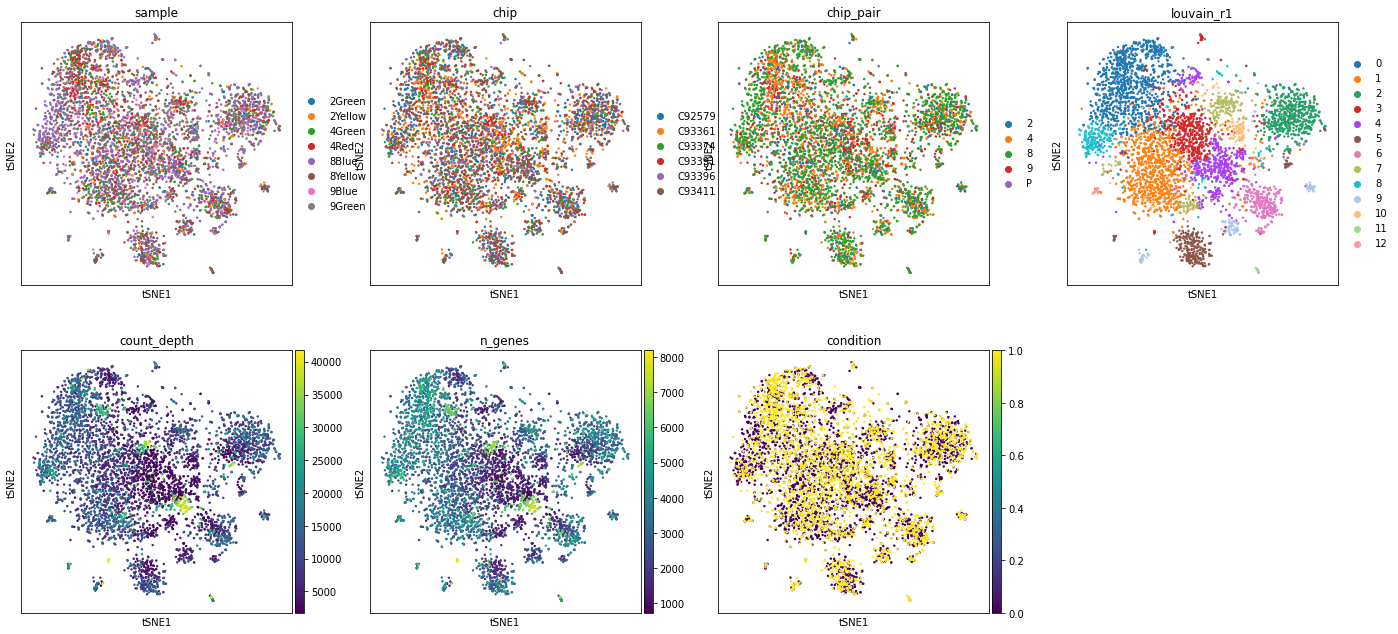

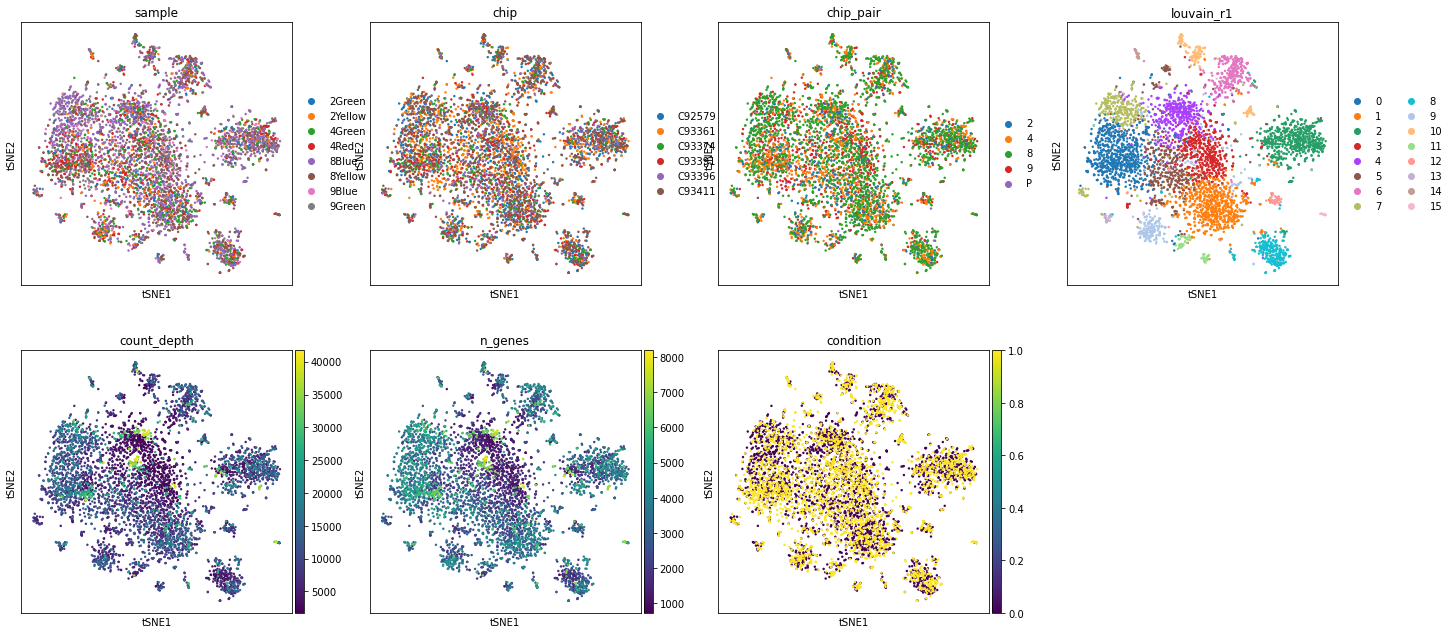

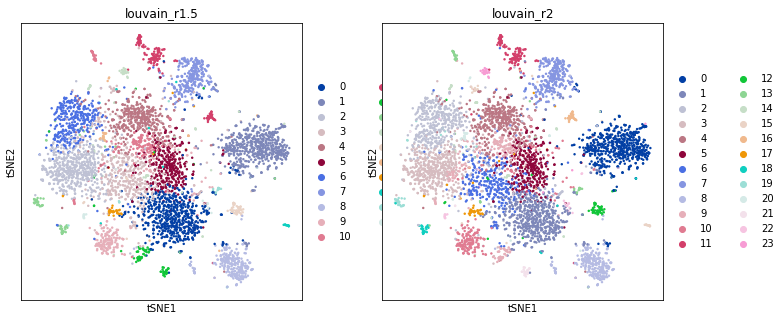

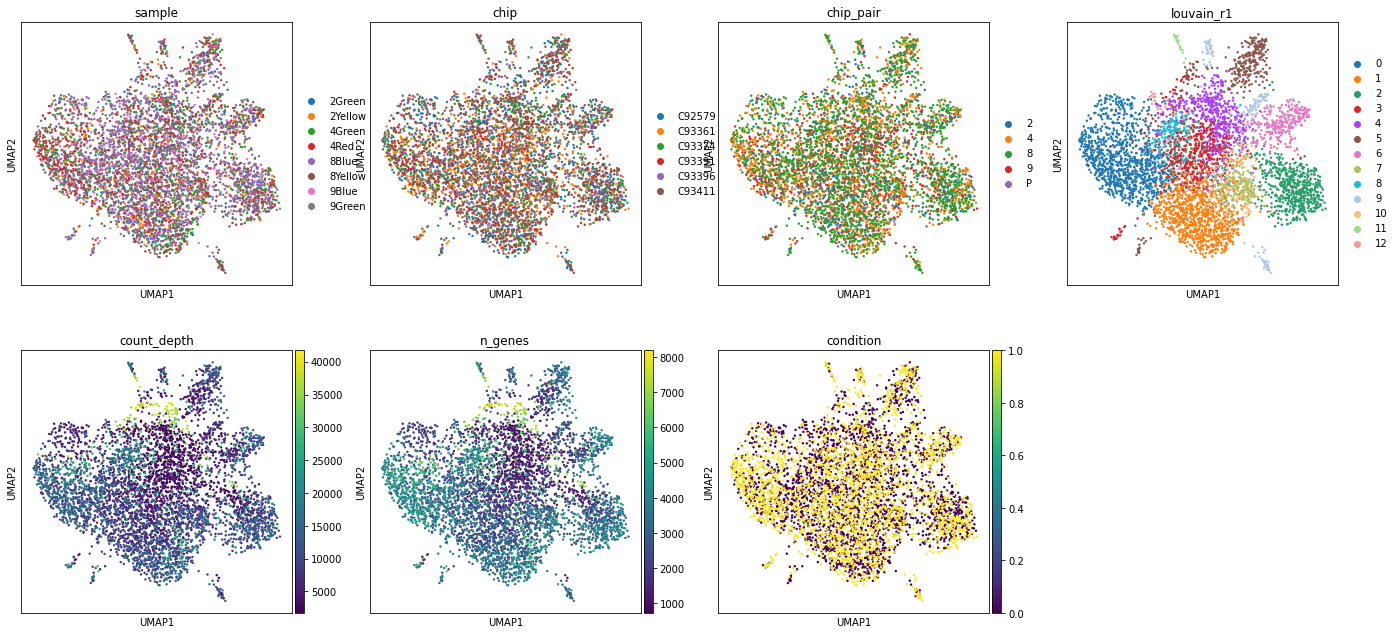

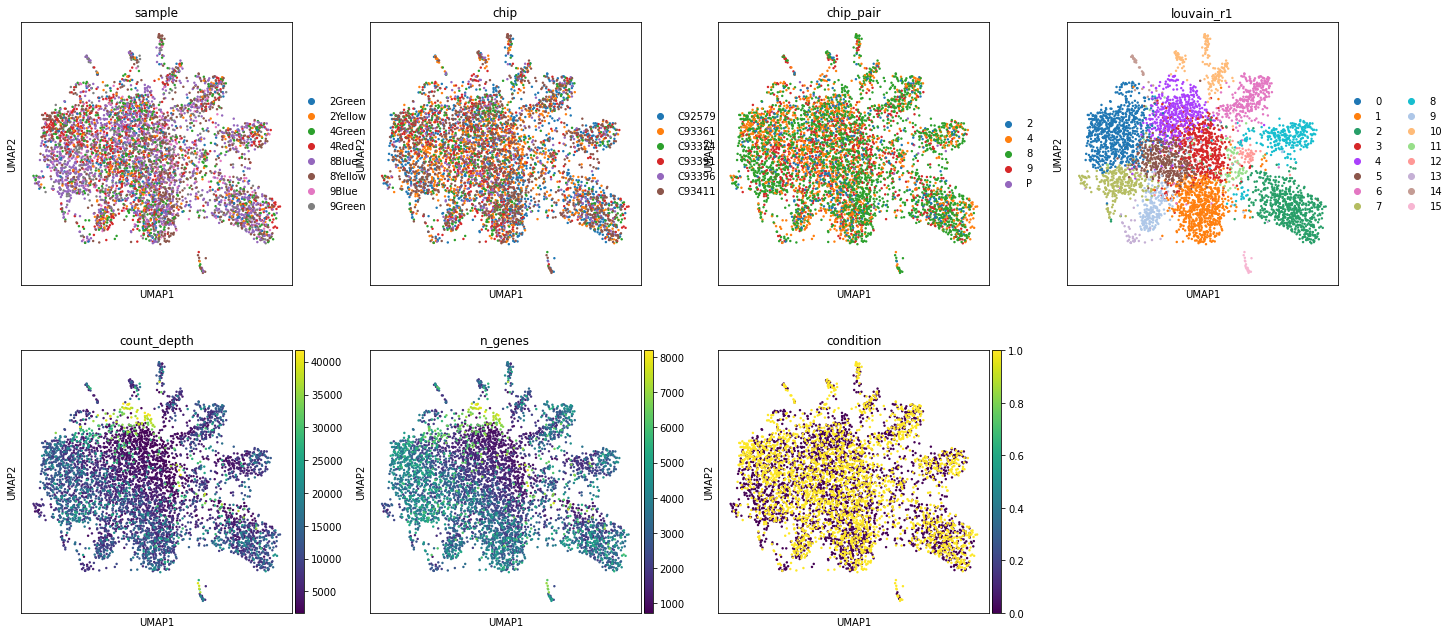

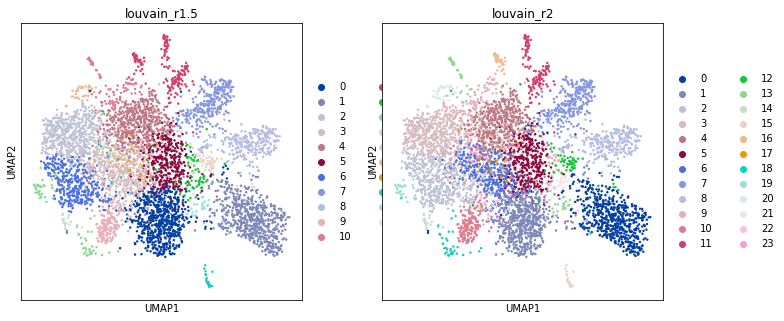

In [14]:
#Plot data:
sc.pl.tsne(adata, color = ['sample', 'chip', 'chip_pair', 'louvain_r1', 'count_depth','n_genes', 'condition'])
sc.pl.tsne(adata_hvg, color = ['sample', 'chip', 'chip_pair', 'louvain_r1', 'count_depth','n_genes', 'condition'])
sc.pl.tsne(adata_hvg, color = ['louvain_r1.5', 'louvain_r2'])

sc.pl.umap(adata, color = ['sample', 'chip', 'chip_pair', 'louvain_r1', 'count_depth','n_genes', 'condition'])
sc.pl.umap(adata_hvg, color = ['sample', 'chip', 'chip_pair', 'louvain_r1', 'count_depth','n_genes', 'condition'])
sc.pl.umap(adata_hvg, color = ['louvain_r1.5', 'louvain_r2'])
#sc.pl.rank_genes_groups(adata, n_genes=20)
#sc.pl.rank_genes_groups_violin(adata, n_genes=20)

### Literature-based cell-type marker expression

These tables show the average expression levels of particular marker genes in the identified clusters. Expression levels are quoted as z-scores.

The smaller tables quote average z-scores over all marker genes of a particular cell type. The longer tables (2nd and 4th) show these expression tables broken down by literature-derived marker. Not all marker genes that were provided will be found in these tables, as not every marker gene is in the data set after the gene filtering that was done in the QC step.

These tables were used to assign cell type markers to each cluster.

Tables 3 and 4 show marker expression for the highly variable gene data set, which is used for further analysis.

In [20]:
#Look at z-scores of group marker gene expression
scores, marker_group_results = evaluate_partition(adata, ct_markers, 'gene_symbols', partition_key='louvain_r1')
marker_group_results

0         1        10        11        12  \
Neuron                      0.171600 -0.069810  0.030416 -0.286837  0.022171   
Glutamatergic Neurons       0.233775 -0.051734 -0.047033 -0.185391  0.157335   
GABA Neurons                0.165926  0.032186 -0.032527 -0.162536  0.110620   
Vascular cells & pericytes -0.079230 -0.104114 -0.111176 -0.085309 -0.015369   
Perivascular Macrophages   -0.038018 -0.054747 -0.011221 -0.080860  0.193668   
Astrocytes                 -0.169969  0.693628  0.050185 -0.053816 -0.026361   
Endothelial                -0.187319 -0.168991 -0.095420 -0.178653 -0.195428   
Microglia                  -0.118460 -0.099807 -0.080015 -0.103596  0.039653   
Oligodendrocytes           -0.207046 -0.201686 -0.144532 -0.277960 -0.230584   
Oligodendrocyte Precursors -0.066426 -0.021267  0.006361 -0.184018  0.021246   
Blood                       0.005482 -0.094959 -0.011558 -0.126512 -0.065781   
Ependymal                  -0.049553 -0.041501 -0.042142  8.910388 -0.110622   

                                   2         3         4         5         6  \
Neuron                     -0.138556 -0.113401 -0.043523 -0.078413 -0.119807   
Glutamatergic Neurons      -0.077670 -0.082935 -0.093086 -0.100738 -0.103153   
GABA Neurons               -0.109904 -0.059181 -0.093088 -0.085282 -0.111334   
Vascular cells & pericytes -0.102573 -0.103633 -0.086870 -0.079715  0.273259   
Perivascular Macrophages   -0.062393 -0.048702 -0.049922  0.700975 -0.051714   
Astrocytes                 -0.218406 -0.065842 -0.192053 -0.162497 -0.122869   
Endothelial                -0.064976 -0.192190 -0.189787 -0.115511  2.620017   
Microglia                  -0.097533 -0.143286 -0.140395  1.639738 -0.034941   
Oligodendrocytes            1.496105 -0.228833 -0.221035 -0.132975 -0.124539   
Oligodendrocyte Precursors -0.081967 -0.078402 -0.111532 -0.064051 -0.103595   
Blood                      -0.105373  0.434176 -0.074776 -0.039042 -0.031614   
Ependymal                  -0.031140 -0.041961 -0.059544 -0.024896 -0.034824   

                                   7         8         9  
Neuron                     -0.016590  0.505048  0.006586  
Glutamatergic Neurons      -0.012153  0.140901 -0.084207  
GABA Neurons               -0.050974  0.150000 -0.070361  
Vascular cells & pericytes -0.082509 -0.053605  2.409188  
Perivascular Macrophages   -0.021149 -0.061467 -0.024224  
Astrocytes                 -0.067484 -0.270744 -0.194957  
Endothelial                -0.168090 -0.222061 -0.143001  
Microglia                  -0.113484 -0.097376 -0.068901  
Oligodendrocytes           -0.067098 -0.266049 -0.195615  
Oligodendrocyte Precursors  1.190394 -0.078121  0.091414  
Blood                      -0.049659 -0.079004 -0.006314  
Ependymal                  -0.030709 -0.072246 -0.073001

In [21]:
#Look at z-scores of marker gene expression

marker_gene_expression(adata, ct_markers, 'gene_symbols', partition_key='louvain_r1')

0         1         2         3         4         5  \
Map2           0.150249 -0.014940 -0.193405 -0.106332 -0.039080 -0.129299   
Nefm           0.179265 -0.108158 -0.019109 -0.150866  0.056579 -0.172658   
Rbfox3         0.162408 -0.078324 -0.093823 -0.140102 -0.016613 -0.054909   
Snap25         0.191545 -0.071227 -0.224969 -0.237046 -0.072321 -0.085609   
Syp            0.175013 -0.110729 -0.097942 -0.097905 -0.042043 -0.041139   
Syt1           0.343384 -0.169242 -0.239056 -0.147385 -0.036536 -0.139301   
Thy1           0.096577 -0.006244 -0.083846 -0.060268 -0.128526 -0.029965   
Ndrg4          0.179925 -0.055888 -0.167945 -0.091689 -0.097771 -0.045728   
Dlg4           0.066031 -0.013533 -0.126906  0.010981 -0.015397 -0.007106   
Slc17a6       -0.014794 -0.054383 -0.021439  0.025572 -0.033311 -0.029909   
Slc17a7        0.335860 -0.152971 -0.107428 -0.110556 -0.009076 -0.140319   
Slc17a8        0.250610 -0.000922  0.006656 -0.058653 -0.174877 -0.094537   
Slc1a1         0.115324 -0.127912 -0.088678 -0.118518 -0.142084 -0.032039   
Spink8         0.066736 -0.035505 -0.016253 -0.070497 -0.031034 -0.042088   
Fibcd1         0.186548 -0.047156 -0.052053 -0.051880 -0.065180  0.034871   
Gria1          0.548876 -0.173864 -0.232181 -0.195505 -0.117811 -0.240768   
Gria2          0.597222 -0.098141 -0.349518 -0.136180 -0.215074 -0.310383   
Gria3          0.416308 -0.162035 -0.130692 -0.123206 -0.131713 -0.173827   
Gria4          0.125966 -0.086282  0.045272 -0.062339 -0.073057 -0.114978   
Grik2          0.418361 -0.072309 -0.044856 -0.118545 -0.082078 -0.201712   
Grik3          0.411572 -0.034594 -0.123088 -0.096960 -0.251056 -0.072659   
Grik4          0.238196 -0.054384 -0.123072 -0.066329 -0.052352 -0.056209   
Grik5          0.296613 -0.032756 -0.056660 -0.099647 -0.238048  0.040279   
Grin1          0.247271 -0.099055 -0.100197 -0.088446 -0.042396 -0.141171   
Grin2a         0.536528 -0.179972 -0.147208 -0.129733 -0.113209 -0.183823   
Grin2b         0.653759 -0.245527 -0.249914 -0.173993 -0.091958 -0.208868   
Grin2c        -0.031070  0.211751 -0.075099 -0.014034 -0.096987 -0.035333   
Grin2d         0.024442  0.012846  0.017241 -0.039404  0.001909 -0.032833   
Grin3a         0.051669  0.020351 -0.041719 -0.036308 -0.066390 -0.130494   
Grin3b         0.075770 -0.031629 -0.057218 -0.090731 -0.139887 -0.009109   
Grm1           0.406600 -0.109203 -0.044732 -0.156567 -0.050112 -0.122157   
Grm2           0.073013 -0.014624 -0.043150 -0.007569 -0.042338 -0.047172   
Grm3          -0.101107  0.353145  0.126328 -0.094593 -0.206168 -0.163769   
Grm4           0.068555 -0.044739 -0.023341 -0.082161 -0.025082 -0.028054   
Grm5           0.563400 -0.214830 -0.188738 -0.090513 -0.181097 -0.193884   
Grm7           0.173418 -0.067448 -0.090789 -0.028705 -0.053544 -0.072382   
Grm8          -0.001243  0.008478  0.006434 -0.064590  0.015775 -0.049097   
Slc1a6         0.045078  0.033382 -0.046342 -0.024517  0.008734 -0.068982   
Slc32a1        0.045191  0.031084 -0.077517 -0.033839 -0.046396  0.082185   
Gabbr1         0.192012  0.071635 -0.113922 -0.053839 -0.119922 -0.139576   
Gabbr2         0.290761 -0.100344 -0.125899 -0.083591 -0.021567 -0.100060   
Gabra1         0.146394 -0.105210 -0.102461 -0.148933  0.011031 -0.072671   
Gabra2         0.480381 -0.088838 -0.190398 -0.196121 -0.121952 -0.131139   
Gabra3         0.134411  0.039846 -0.118357 -0.051882 -0.086347 -0.016645   
Gabra4         0.057829  0.041474 -0.078133 -0.087513  0.001090 -0.080692   
Gabra5         0.101581 -0.046794 -0.122474 -0.050432  0.012785 -0.101381   
Gabrb1         0.141728  0.266687 -0.235272 -0.030832 -0.082967 -0.137573   
Gabrb2         0.164725 -0.043108 -0.019099 -0.009977 -0.080445 -0.124415   
Gabrb3         0.246977 -0.123315 -0.097472 -0.057835 -0.061614 -0.119146   
Gabrd          0.046944 -0.012733 -0.084546  0.038589 -0.065909  0.060251   
Gabrg1        -0.097913  0.319903 -0.168483  0.028986 -0.103843 -0.047160   
Gabrg2         0.2

In [22]:
#Look at z-scores of group marker gene expression
scores, marker_group_results = evaluate_partition(adata_hvg, ct_markers, 'gene_symbols', partition_key='louvain_r1')
marker_group_results

0         1        10        11        12  \
Neuron                      0.204757 -0.055227  0.012867 -0.001206 -0.016241   
Glutamatergic Neurons       0.317152 -0.088030 -0.077264 -0.042480 -0.006562   
GABA Neurons                0.186019  0.020517 -0.047837  0.002887  0.064908   
Vascular cells & pericytes -0.117646 -0.109496  2.485312 -0.126327 -0.090674   
Perivascular Macrophages   -0.041347 -0.040780 -0.065829  0.024588 -0.071431   
Astrocytes                 -0.250534  0.938785 -0.220917  0.116285  0.229326   
Endothelial                -0.204784 -0.182274 -0.149981 -0.123768 -0.119621   
Microglia                  -0.120633 -0.118010 -0.088533 -0.122589 -0.044756   
Oligodendrocytes           -0.263065 -0.257838 -0.229012 -0.230537 -0.174635   
Oligodendrocyte Precursors -0.078158 -0.016954  0.063574  0.049280 -0.016727   
Blood                       0.000302 -0.101989 -0.004799 -0.124481 -0.081065   
Ependymal                  -0.051437 -0.044823 -0.065566 -0.023709 -0.010468   

                                  13        14        15         2         3  \
Neuron                      0.050293  0.056934 -0.219098 -0.163271 -0.156112   
Glutamatergic Neurons      -0.003416  0.036837 -0.214366 -0.099928 -0.126457   
GABA Neurons                0.119296  0.179125 -0.144894 -0.121178 -0.123540   
Vascular cells & pericytes -0.108801 -0.141853 -0.107104 -0.118314 -0.113843   
Perivascular Macrophages   -0.074046 -0.094180 -0.095933 -0.046218 -0.045206   
Astrocytes                  0.048101 -0.216422 -0.096868 -0.243270  0.109970   
Endothelial                -0.222077  0.058583 -0.097045 -0.073149 -0.186606   
Microglia                  -0.065679 -0.138890 -0.082976 -0.105308 -0.154574   
Oligodendrocytes           -0.168310 -0.180938 -0.280074  1.718917 -0.260790   
Oligodendrocyte Precursors -0.020192 -0.135396 -0.155745 -0.072602 -0.061055   
Blood                      -0.028462  9.102999 -0.133332 -0.116778 -0.062655   
Ependymal                  -0.081641 -0.049878  8.400085 -0.031457 -0.023967   

                                   4         5         6         7         8  \
Neuron                      0.012088  0.029134 -0.116979  0.354316 -0.091199   
Glutamatergic Neurons      -0.055267  0.023281 -0.126952  0.207988 -0.121864   
GABA Neurons               -0.056084  0.040407 -0.129088  0.271230 -0.097901   
Vascular cells & pericytes -0.116618 -0.123021  0.272907 -0.068514 -0.102438   
Perivascular Macrophages   -0.049172 -0.040200 -0.017855 -0.043549  0.680760   
Astrocytes                 -0.332672  0.044764 -0.161593 -0.245580 -0.184283   
Endothelial                -0.222162 -0.162809  2.621538 -0.197190 -0.128576   
Microglia                  -0.150646 -0.117553 -0.071897 -0.134823  1.910518   
Oligodendrocytes           -0.301142 -0.204071 -0.165136 -0.264166 -0.205254   
Oligodendrocyte Precursors -0.140475 -0.104137 -0.093664 -0.061219 -0.116961   
Blood                      -0.088395 -0.029777 -0.027037 -0.056767 -0.033093   
Ependymal                  -0.082852 -0.047290 -0.039205 -0.068823 -0.030325   

                                   9  
Neuron                      0.014596  
Glutamatergic Neurons      -0.009136  
GABA Neurons               -0.090124  
Vascular cells & pericytes -0.112474  
Perivascular Macrophages   -0.038876  
Astrocytes                 -0.073577  
Endothelial                -0.210493  
Microglia                  -0.109878  
Oligodendrocytes           -0.218945  
Oligodendrocyte Precursors  1.440550  
Blood                      -0.027063  
Ependymal                  -0.059192

In [23]:
#Look at z-scores of marker gene expression
marker_gene_expression(adata_hvg, ct_markers, 'gene_symbols', partition_key='louvain_r1')

0         1         2         3         4         5  \
Map2           0.180239  0.019858 -0.209934 -0.182162  0.052944  0.048129   
Rbfox3         0.171157 -0.074194 -0.084072 -0.099303 -0.017885 -0.000722   
Syt1           0.396396 -0.159492 -0.235008 -0.271826  0.051204  0.067362   
Ndrg4          0.195216 -0.027886 -0.173348 -0.187311 -0.021000  0.005609   
Dlg4           0.080776 -0.034418 -0.113989 -0.039959 -0.004822  0.025290   
Slc17a6       -0.000987 -0.059855 -0.032628 -0.029155 -0.060888  0.032073   
Slc17a7        0.459840 -0.125311 -0.115506 -0.171067 -0.014467 -0.030818   
Spink8         0.094580 -0.046219 -0.033611 -0.068063 -0.044114  0.083469   
Gria1          0.654961 -0.198189 -0.209171 -0.298757 -0.067713  0.016001   
Gria2          0.707479 -0.123527 -0.335459 -0.275204 -0.188190  0.229783   
Gria3          0.533216 -0.192839 -0.137124 -0.197219 -0.126146 -0.069303   
Gria4          0.143277 -0.142366  0.038372 -0.076499 -0.060420 -0.065270   
Grin1          0.312423 -0.118828 -0.090986 -0.110599  0.003944 -0.086571   
Grin2b         0.863500 -0.254792 -0.250286 -0.259137 -0.023595 -0.020297   
Grin2c        -0.105475  0.226290 -0.067566  0.026030 -0.103712  0.279081   
Grin3a         0.088684  0.031589 -0.051349  0.007592 -0.078709 -0.038440   
Grm1           0.456788 -0.132124 -0.024645 -0.179180 -0.022917  0.034229   
Grm7           0.250651 -0.098540 -0.087200 -0.089958  0.002129 -0.015590   
Grm8          -0.018813  0.002298 -0.001836 -0.049184  0.011055 -0.022415   
Gabbr1         0.180937  0.076510 -0.107049 -0.121726 -0.121476  0.092071   
Gabra1         0.165063 -0.081943 -0.111214 -0.148298  0.014200  0.000753   
Gabra2         0.543132 -0.078582 -0.188459 -0.253442 -0.163074  0.150738   
Gabra4         0.061558  0.087429 -0.085520 -0.137634  0.020468  0.026004   
Gabra5         0.144683 -0.046570 -0.129354 -0.122364  0.037506 -0.055315   
Gabrb3         0.315202 -0.144575 -0.086334 -0.147853 -0.048991  0.028133   
Gabrg1        -0.145944  0.461358 -0.161347  0.081903 -0.178710  0.117800   
Gabrg2         0.223520 -0.109495 -0.100150 -0.138906 -0.008592 -0.036924   
Vtn           -0.155743 -0.149974 -0.120988 -0.164126 -0.186359 -0.149237   
Myl9          -0.127737 -0.100877 -0.143242 -0.113704 -0.135292 -0.108242   
Higd1b        -0.107462 -0.112522 -0.119893 -0.125529 -0.091684 -0.120563   
Slc6a20a      -0.079641 -0.074611 -0.089134 -0.052012 -0.053137 -0.114041   
Pf4           -0.040196 -0.051451 -0.033468 -0.046434 -0.051852 -0.053266   
Cd209f        -0.042498 -0.030109 -0.058968 -0.043977 -0.046493 -0.027133   
Slc1a3        -0.321049  1.262451 -0.279309  0.154749 -0.466083  0.126087   
Aldh1l1       -0.137293  0.436966 -0.153638  0.110580 -0.151424  0.036537   
Aldoc         -0.304385  1.333319 -0.358437  0.140066 -0.457586  0.010348   
Fabp7         -0.292723  0.767737 -0.203407 -0.006275 -0.279957  0.010836   
Gfap          -0.136522  0.638871 -0.140293  0.033337 -0.176924 -0.027081   
Gja1          -0.311234  1.193363 -0.324538  0.227361 -0.464055  0.111859   
Cldn5         -0.207298 -0.188484 -0.160961 -0.184292 -0.198811 -0.142130   
Flt1          -0.201939 -0.212713  0.121363 -0.175692 -0.227530 -0.210872   
Ly6c1         -0.205116 -0.145624 -0.179848 -0.199835 -0.240144 -0.135426   
Aif1          -0.116782 -0.097127 -0.100256 -0.127510 -0.138330 -0.078983   
C1qa          -0.197703 -0.122122 -0.096212 -0.164450 -0.140357 -0.133469   
Cd68          -0.062406 -0.098670 -0.095772 -0.118239 -0.113997 -0.088183   
Itgam          0.072444 -0.143323 -0.078363 -0.135232 -0.163007 -0.084678   
Ptprc         -0.070792 -0.062888 -0.067210 -0.071696 -0.043601 -0.084058   
Ctss          -0.189395 -0.121577 -0.168020 -0.227723 -0.220333 -0.143791   
P2ry12        -0.183166 -0.147743 -0.133366 -0.190489 -0.200447 -0.182213   
Csf1r         -0.179050 -0.152460 -0.108901 -0.183991 -0.191735 -0.153087   
Gpr34         -0.158844 -0.116181 -0.099669 -0.171839 -0.144010 -0.109513   
Cldn11        -0.2

In [24]:
#Look at z-scores of group marker gene expression
scores, marker_group_results = evaluate_partition(adata_hvg, ct_markers, 'gene_symbols', partition_key='louvain_r1.5')
marker_group_results

0         1        10        11        12  \
Neuron                     -0.050467 -0.165534 -0.047163  0.000534  0.005826   
Glutamatergic Neurons      -0.091381 -0.099457 -0.066547 -0.079769 -0.029462   
GABA Neurons                0.022879 -0.121717 -0.067502 -0.053455  0.002207   
Vascular cells & pericytes -0.106064 -0.118077 -0.120341  2.422322 -0.126895   
Perivascular Macrophages   -0.037966 -0.045554 -0.085692 -0.066085  0.025324   
Astrocytes                  0.963508 -0.243728 -0.281125 -0.212886  0.124710   
Endothelial                -0.183987 -0.072494 -0.180230 -0.122951 -0.121637   
Microglia                  -0.117239 -0.105244 -0.147743 -0.090251 -0.121865   
Oligodendrocytes           -0.256587  1.735576 -0.316216 -0.233517 -0.229408   
Oligodendrocyte Precursors -0.016874 -0.071446 -0.097567  0.060657  0.085995   
Blood                      -0.110781 -0.116925  1.412148 -0.007487 -0.129547   
Ependymal                  -0.049242 -0.030626 -0.067223 -0.057154 -0.024423   

                                  13        14        15        16        17  \
Neuron                      0.091841  0.121967 -0.010494  0.133561 -0.046512   
Glutamatergic Neurons       0.064641 -0.006168 -0.014754  0.294594 -0.058339   
GABA Neurons                0.100613  0.036350  0.048945  0.092706 -0.099004   
Vascular cells & pericytes -0.100271 -0.100262 -0.093023 -0.118622 -0.138091   
Perivascular Macrophages   -0.059385 -0.067414 -0.072534 -0.035076 -0.074778   
Astrocytes                  0.004135 -0.014553  0.219576 -0.080468  0.069008   
Endothelial                -0.197956 -0.098369 -0.120163 -0.236281 -0.152473   
Microglia                  -0.112796 -0.057048 -0.055093 -0.114723 -0.138859   
Oligodendrocytes           -0.174299 -0.153758 -0.107905 -0.231522 -0.253045   
Oligodendrocyte Precursors -0.053348 -0.005549 -0.019572 -0.050082 -0.098217   
Blood                      -0.067352  0.056154 -0.075584 -0.100382 -0.106091   
Ependymal                  -0.064863 -0.060945 -0.018612  0.026723 -0.049525   

                                  18        19         2        20         3  \
Neuron                     -0.219098 -0.063809  0.135946 -0.003888  0.017898   
Glutamatergic Neurons      -0.214366 -0.039932  0.297927  0.014948  0.026080   
GABA Neurons               -0.144894  0.022115  0.168447 -0.064833  0.046007   
Vascular cells & pericytes -0.107104 -0.114906 -0.113716 -0.152774 -0.119779   
Perivascular Macrophages   -0.095933 -0.034146 -0.043346 -0.067797 -0.042387   
Astrocytes                 -0.096868  0.038765 -0.247678  0.010012  0.050105   
Endothelial                -0.097045 -0.105163 -0.202084 -0.218137 -0.169696   
Microglia                  -0.082976  0.294003 -0.117054 -0.151680 -0.123153   
Oligodendrocytes           -0.280074 -0.272248 -0.256753 -0.092332 -0.214151   
Oligodendrocyte Precursors -0.155745  0.071575 -0.081097 -0.000177 -0.100775   
Blood                      -0.133332  0.053752  0.014693  0.024512 -0.020273   
Ependymal                   8.400085 -0.013856 -0.052495  0.000564 -0.029092   

                                   4         5         6         7         8  \
Neuron                      0.011315 -0.177329  0.477487 -0.115244 -0.091752   
Glutamatergic Neurons      -0.051430 -0.141323  0.336467 -0.127135 -0.127668   
GABA Neurons               -0.046388 -0.124708  0.323619 -0.126841 -0.111247   
Vascular cells & pericytes -0.119606 -0.120604 -0.088671  0.263090 -0.103167   
Perivascular Macrophages   -0.042656 -0.038314 -0.032347 -0.017296  0.725541   
Astrocytes                 -0.314676  0.219920 -0.314717 -0.156498 -0.182881   
Endothelial                -0.211036 -0.189061 -0.215937  2.622792 -0.122492   
Microglia                  -0.149377 -0.150025 -0.147588 -0.077918  2.019509   
Oligodendrocytes           -0.284073 -0.270465 -0.286695 -0.164799 -0.199238   
Oligodendrocyte Precursors -0.146194 -0.085120 -0.063504 -0.095326 -0.120536   
Blood                      -0.06

In [25]:
#Look at z-scores of marker gene expression
marker_gene_expression(adata_hvg, ct_markers, 'gene_symbols', partition_key='louvain_r1.5')

0         1         2         3         4         5  \
Map2           0.031306 -0.213394  0.082220  0.074308  0.046079 -0.267984   
Rbfox3        -0.059874 -0.083754  0.187880  0.020772  0.038083 -0.127131   
Syt1          -0.162810 -0.234511  0.235951  0.034373  0.066429 -0.296780   
Ndrg4         -0.027324 -0.182879  0.092123 -0.057172 -0.024929 -0.206110   
Dlg4          -0.033635 -0.113131  0.081553  0.017212 -0.069086  0.011360   
Slc17a6       -0.058142 -0.030397 -0.047980  0.089682 -0.023488 -0.021805   
Slc17a7       -0.134069 -0.111284  0.427174 -0.020111 -0.022547 -0.167179   
Spink8        -0.081804 -0.030362  0.037015  0.079642 -0.032028 -0.052747   
Gria1         -0.190919 -0.211000  0.609626  0.011527 -0.069520 -0.326777   
Gria2         -0.120019 -0.342581  0.635496  0.195403 -0.182748 -0.321666   
Gria3         -0.208798 -0.140397  0.499899 -0.038748 -0.114052 -0.151133   
Gria4         -0.144053  0.043569  0.173345 -0.056368 -0.064112 -0.127741   
Grin1         -0.131696 -0.089610  0.289486 -0.049518  0.011698 -0.218825   
Grin2b        -0.259637 -0.254586  0.762593  0.012755 -0.023144 -0.292928   
Grin2c         0.210724 -0.071926 -0.080869  0.229143 -0.079073  0.043655   
Grin3a         0.044079 -0.048943  0.107320 -0.026826 -0.095952 -0.015446   
Grm1          -0.130112 -0.019267  0.537268  0.023600 -0.041169 -0.223943   
Grm7          -0.084127 -0.085436  0.273853 -0.025665 -0.001731 -0.108352   
Grm8           0.009233 -0.000176 -0.053255 -0.059390  0.017845  0.006358   
Gabbr1         0.087557 -0.105372  0.168773  0.093186 -0.096494 -0.119671   
Gabra1        -0.082628 -0.109134  0.141355  0.009093  0.001529 -0.135087   
Gabra2        -0.092646 -0.189279  0.589564  0.136372 -0.146618 -0.269864   
Gabra4         0.106179 -0.082778  0.022462  0.025861 -0.007344 -0.165039   
Gabra5        -0.042116 -0.129697  0.071864 -0.008722  0.056218 -0.123330   
Gabrb3        -0.138612 -0.085438  0.344788  0.007944 -0.023065 -0.209643   
Gabrg1         0.460692 -0.172262 -0.160639  0.118751 -0.176273  0.175504   
Gabrg2        -0.115391 -0.099775  0.169411 -0.014429  0.020940 -0.150535   
Vtn           -0.148456 -0.121613 -0.156690 -0.154949 -0.186404 -0.159939   
Myl9          -0.098844 -0.142576 -0.119712 -0.106486 -0.123355 -0.137497   
Higd1b        -0.110592 -0.119344 -0.102370 -0.129272 -0.100212 -0.145299   
Slc6a20a      -0.066364 -0.088774 -0.076092 -0.088410 -0.068451 -0.039680   
Pf4           -0.049403 -0.032522 -0.046633 -0.055346 -0.044336 -0.034143   
Cd209f        -0.026528 -0.058586 -0.040060 -0.029427 -0.040977 -0.042484   
Slc1a3         1.280306 -0.280631 -0.298244  0.133037 -0.456256  0.340978   
Aldh1l1        0.454161 -0.159111 -0.151163  0.033546 -0.128894  0.159220   
Aldoc          1.371004 -0.356331 -0.317547  0.037709 -0.414280  0.268179   
Fabp7          0.791449 -0.200553 -0.280744 -0.013104 -0.265028  0.066215   
Gfap           0.663130 -0.140494 -0.122197 -0.014054 -0.157622  0.066802   
Gja1           1.220996 -0.325248 -0.316173  0.123498 -0.465977  0.418126   
Cldn5         -0.189295 -0.160487 -0.208495 -0.171379 -0.185416 -0.184354   
Flt1          -0.213120  0.121372 -0.203507 -0.200412 -0.218125 -0.187851   
Ly6c1         -0.149545 -0.178367 -0.194250 -0.137297 -0.229568 -0.194979   
Aif1          -0.087922 -0.099244 -0.119035 -0.090598 -0.136341 -0.114071   
C1qa          -0.121876 -0.094688 -0.191544 -0.140977 -0.139593 -0.157807   
Cd68          -0.095547 -0.103650 -0.073460 -0.079765 -0.096548 -0.112235   
Itgam         -0.140054 -0.076241  0.095877 -0.100309 -0.177773 -0.139947   
Ptprc         -0.063081 -0.066611 -0.066495 -0.086340 -0.046222 -0.056478   
Ctss          -0.124066 -0.168854 -0.183941 -0.133157 -0.215956 -0.223792   
P2ry12        -0.150056 -0.132204 -0.176576 -0.188815 -0.196136 -0.192497   
Csf1r         -0.156367 -0.107477 -0.183853 -0.146106 -0.185071 -0.194980   
Gpr34         -0.116182 -0.098222 -0.154460 -0.142314 -0.150750 -0.158422   
Cldn11        -0.2

In [26]:
adata_hvg.rename_categories(
    'louvain_r1', 
    [
        'Neurons 1', 
        'Astro 1', 
        'Oligodendrocytes', 
        'Astro 2', 
        'Unknown', 
        'Astro 3', 
        'Endothelial', 
        'Neurons 2', 
        'Microglia', 
        'OPCs', 
        'Pericytes + Vascular', 
        'Astro 4', 
        'Astro 5', 
        'Unknown 2', 
        'Blood',
        'Ependymal'
    ]
)

adata.obs.louvain_r1 = adata_hvg.obs.louvain_r1.copy()

### t-SNE plots with cell-type labels

These are t-SNE plots with cell-type labels that were assigned based on marker expression z-scores shown above. The mapping from louvain cluster ID to cluster name (e.g. 'Neuron 2') is given by the assignment above. The order of cluster names is in contiguous order of cluster IDs starting from 0. For example, 'Neurons 1' in the adata data set corresponds to cluster ID 0.

Below the labelled t-SNE plots are the same plots showing the expression of marker genes.

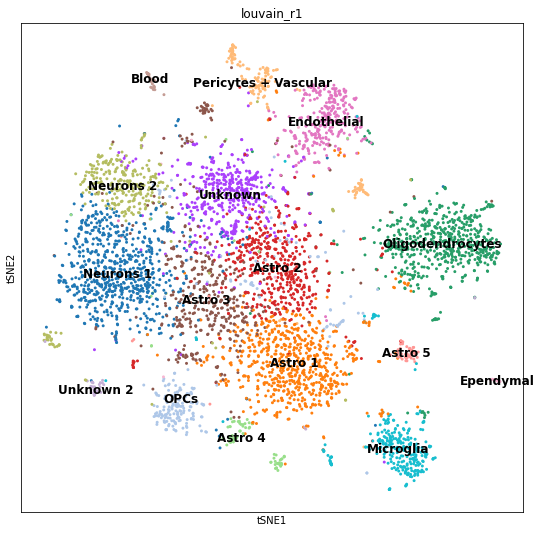

In [27]:
rcParams['figure.figsize']=(9,9) #rescale figures
sc.pl.tsne(adata_hvg, color='louvain_r1', size=35, legend_loc='on data', legend_fontsize=12, legend_fontweight='bold')
rcParams['figure.figsize']=(5,5) #rescale figures

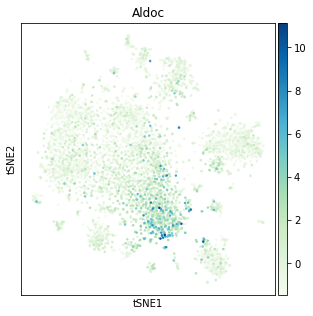

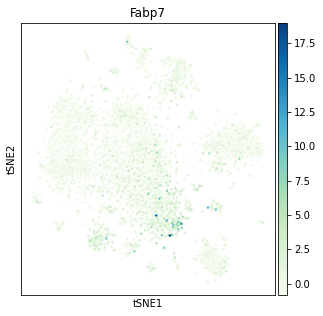

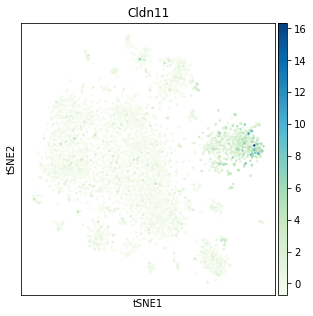

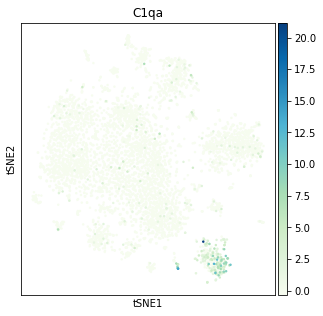

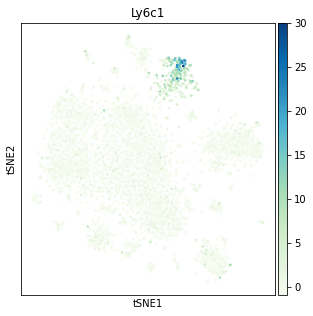

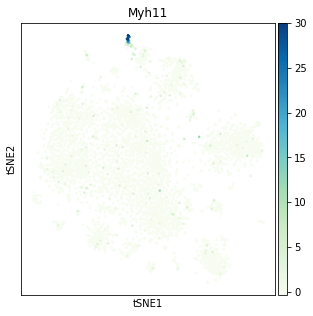

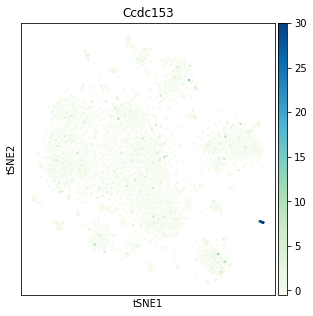

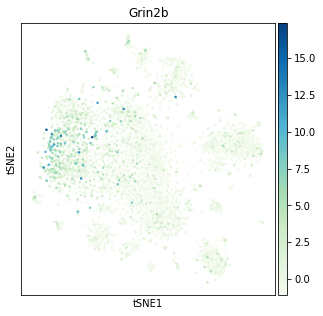

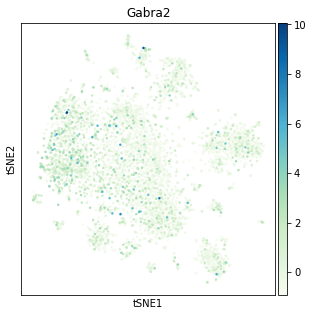

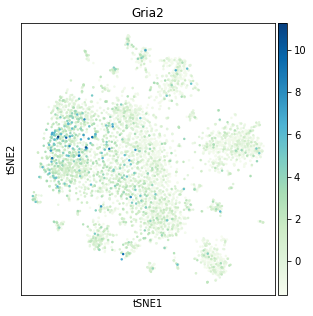

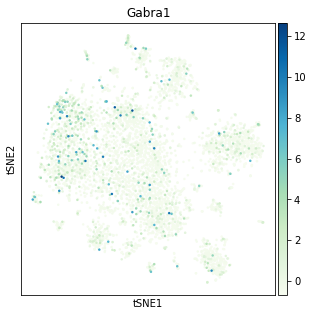

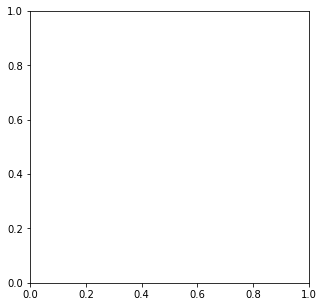

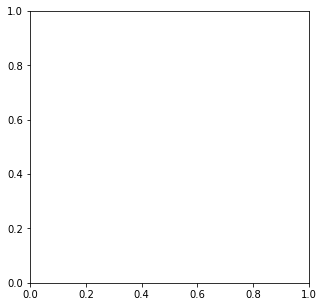

In [28]:
#Show marker expression
marker_genes = ['Aldoc', 'Fabp7', 'Cldn11', 'C1qa', 'Ly6c1', 'Myh11', 'Ccdc153', 'Grin2b', 'Gabra2', 'Gria2', 'Gabra1', 'Gabrb2', 'Slc1a1']
for gene in marker_genes:
    sc.pl.tsne(adata_hvg, color=adata_hvg.var_names[np.flatnonzero(adata_hvg.var['gene_symbols']==gene)], title=gene, color_map='GnBu')

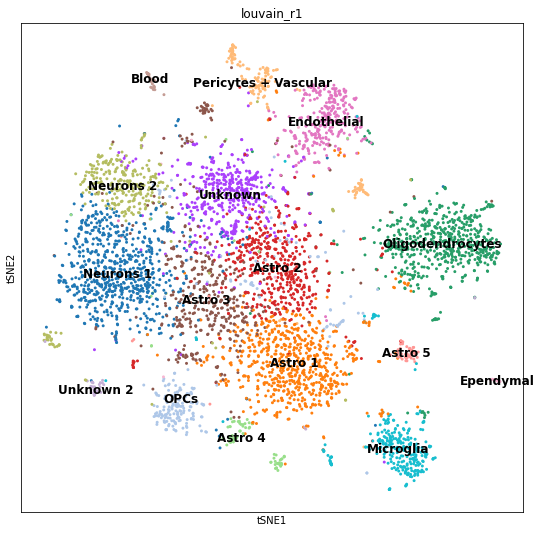

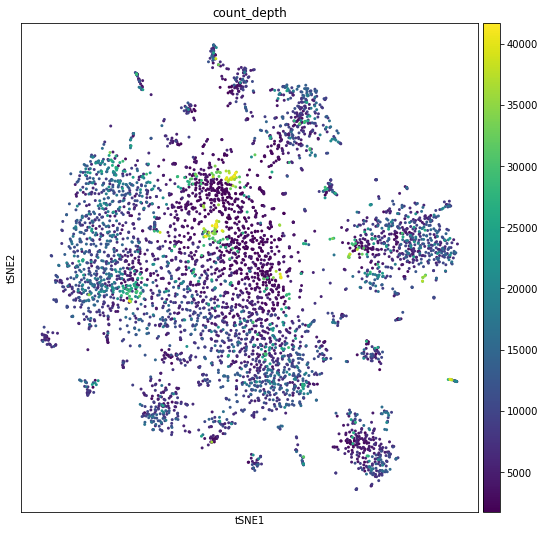

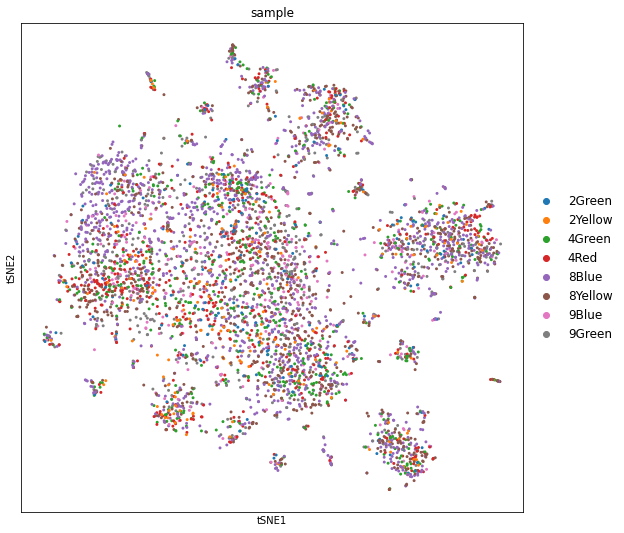

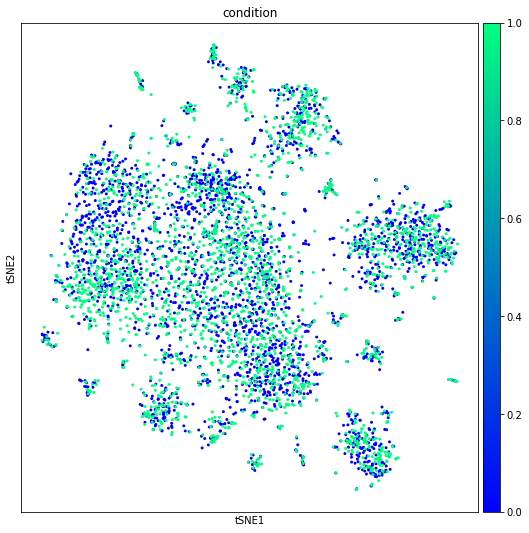

In [29]:
rcParams['figure.figsize']=(9,9) #rescale figures
sc.pl.tsne(adata_hvg, color='louvain_r1', size=35, legend_loc='on data', legend_fontsize=12, legend_fontweight='bold', save='_ketamine_full_scran_nb_hvg_clusters_rerun')
sc.pl.tsne(adata_hvg, color='count_depth', size=35, legend_fontsize=12, legend_fontweight='bold', save='_ketamine_full_scran_nb_hvg_count_depth_rerun')
sc.pl.tsne(adata_hvg, color='sample', size=35, legend_fontsize=12, legend_fontweight='bold', save='_ketamine_full_scran_nb_hvg_sample_rerun')
sc.pl.tsne(adata_hvg, color='condition', size=35, legend_fontsize=12, legend_fontweight='bold', save='_ketamine_full_scran_nb_hvg_condition_rerun', color_map='winter')
rcParams['figure.figsize']=(5,5) #rescale figures

# Merge Astrocytes

In [30]:
adata_hvg.obs['louvain_final'] = adata_hvg.obs.louvain_r1.copy()

In [31]:
adata_hvg.obs.louvain_final = adata_hvg.obs.louvain_final.cat.add_categories(['Astrocytes'])
adata_hvg.obs.louvain_final[
    adata_hvg.obs.louvain_final.isin(
        [
            'Astro 1',
            'Astro 2',
            'Astro 3',
            'Astro 4',
            'Astro 5',
        ]
    )
] = 'Astrocytes'

adata_hvg.obs.louvain_final = adata_hvg.obs.louvain_final.cat.remove_unused_categories()

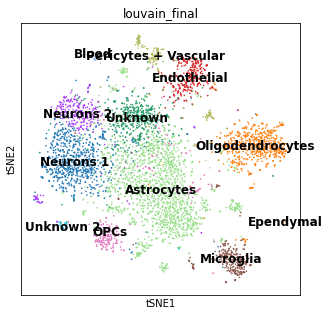

In [32]:
sc.pl.tsne(adata_hvg, color='louvain_final', size=10, legend_loc='on data', legend_fontsize=12, legend_fontweight='bold')

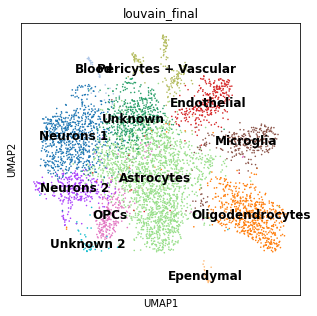

In [33]:
sc.pl.umap(adata_hvg, color='louvain_final', size=10, legend_loc='on data', legend_fontsize=12, legend_fontweight='bold')

# Merge Neurons

In [34]:
adata_hvg.obs.louvain_final = adata_hvg.obs.louvain_final.cat.add_categories(['Neurons'])
adata_hvg.obs.louvain_final[
    adata_hvg.obs.louvain_final.isin(
        [
            'Neurons 1',
            'Neurons 2',
        ]
    )
] = 'Neurons'

adata_hvg.obs.louvain_final = adata_hvg.obs.louvain_final.cat.remove_unused_categories()

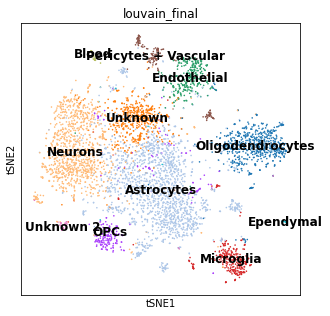

In [35]:
sc.pl.tsne(adata_hvg, color='louvain_final', size=10, legend_loc='on data', legend_fontsize=12, legend_fontweight='bold')

## Marker genes & subclustering

In [36]:
sc.tl.rank_genes_groups(adata_hvg, groupby='louvain_final', gene_symbols='gene_symbols')

ranking genes


/app/python37/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)


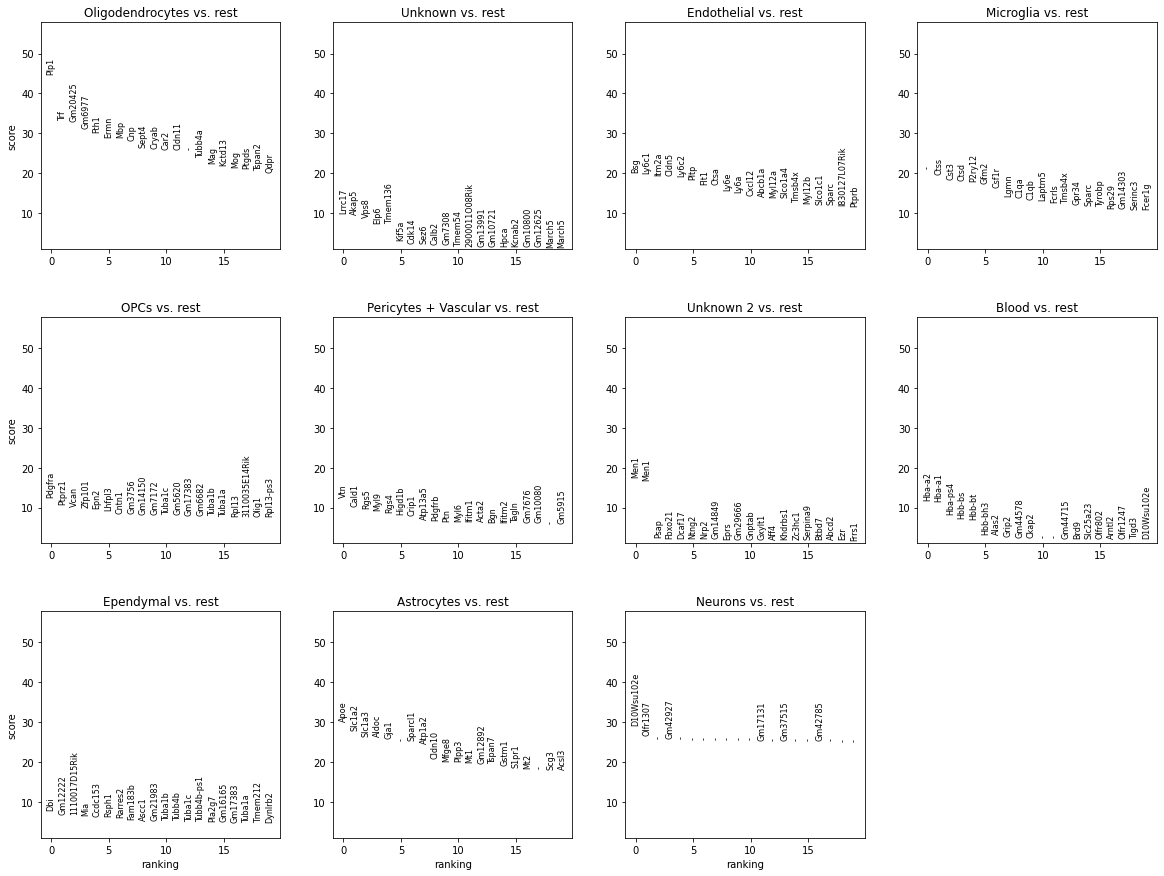

In [37]:
sc.pl.rank_genes_groups(adata_hvg, gene_symbols='gene_symbols')

In [38]:
def rank_genes_groups_sub(adata, groupby, subcluster, resolution=0.2): 
    adata_sub = adata[adata.obs[groupby]==subcluster].copy()
    sc.tl.louvain(adata_sub, resolution=resolution, key_added='louvain_' + subcluster + '_sub')
    sc.tl.rank_genes_groups(adata_sub, groupby='louvain_' + subcluster + '_sub', key_added='rank_sub')
    sc.pl.rank_genes_groups(adata_sub, key='rank_sub', gene_symbols='gene_symbols')
    return None

# Neurons

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_Neurons_sub', the cluster labels (adata.obs, categorical) (0:00:00)


/app/python37/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


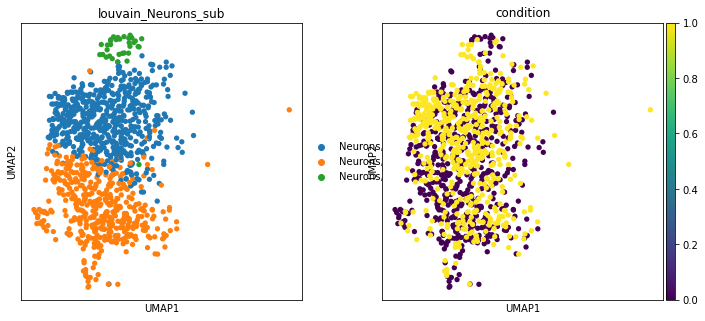

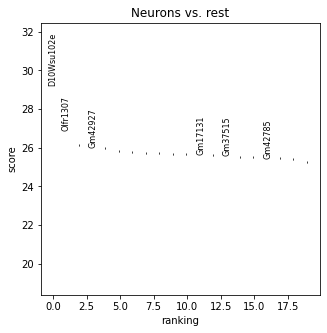

ranking genes
    finished: added to `.uns['rank_genes_Neurons_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


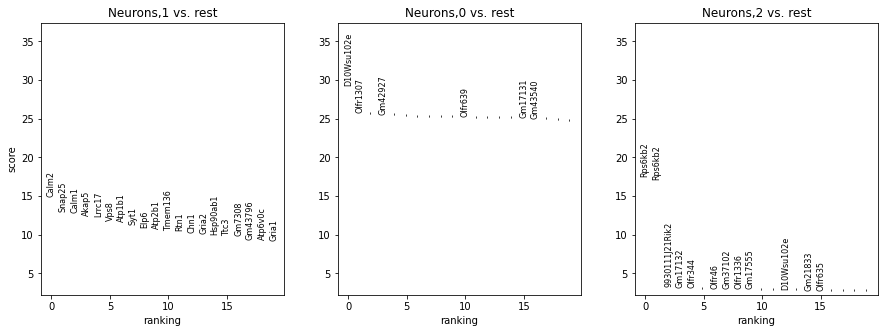

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain_Neurons_sub', the cluster labels (adata.obs, categorical) (0:00:00)
ranking genes
    finished: added to `.uns['rank_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


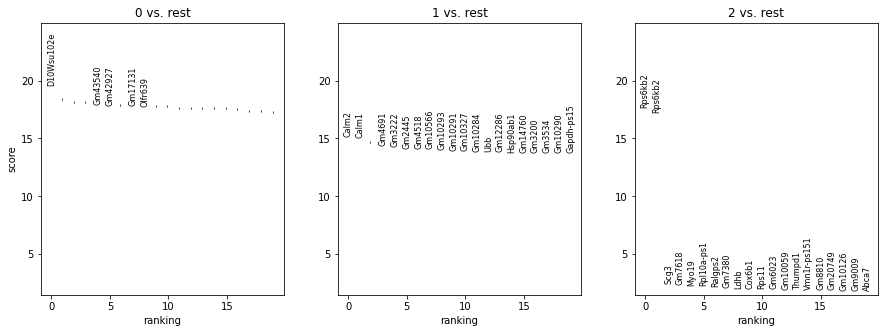

In [39]:
subcluster = 'Neurons'
louvain_res = 0.4
sc.tl.louvain(adata_hvg, restrict_to=('louvain_final', [subcluster]), resolution=louvain_res, key_added='louvain_' + subcluster + '_sub')
sc.pl.umap(adata_hvg[adata_hvg.obs['louvain_final']==subcluster], color=['louvain_' + subcluster + '_sub', 'condition'])

#Get the new marker genes
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_groups',
    gene_symbols='gene_symbols',
    groups=[subcluster]
)
sc.tl.rank_genes_groups(
    adata_hvg,
    groupby='louvain_' + subcluster + '_sub', key_added='rank_genes_' + subcluster + '_sub'
)
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_' + subcluster + '_sub',
    gene_symbols='gene_symbols',
    groups=adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].str.startswith(subcluster)].unique()
)

rank_genes_groups_sub(adata_hvg, 'louvain_final', subcluster, louvain_res)

In [40]:
adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.add_categories(['tmp', 'Glut Neurons', 'GABA Neurons'])
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',0'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Glut Neurons'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',1'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Glut Neurons'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',2'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'GABA Neurons'

adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.remove_unused_categories()
adata_hvg.obs['louvain_final'] = adata_hvg.obs['louvain_' + subcluster + '_sub']
del adata_hvg.obs['louvain_' + subcluster + '_sub']

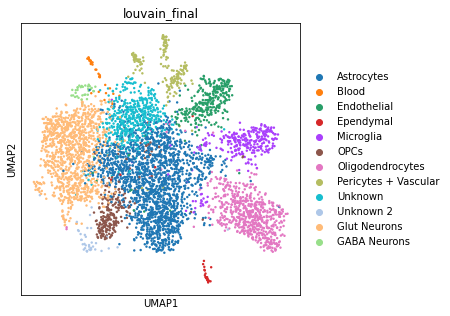

In [41]:
sc.pl.umap(adata_hvg, color='louvain_final')

# Pericytes

In [42]:
adata_hvg.obs['louvain_ref'] = adata_hvg_reference.obs.louvain_final.copy()

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain_Pericytes + Vascular_sub', the cluster labels (adata.obs, categorical) (0:00:00)


Trying to set attribute `.uns` of view, copying.


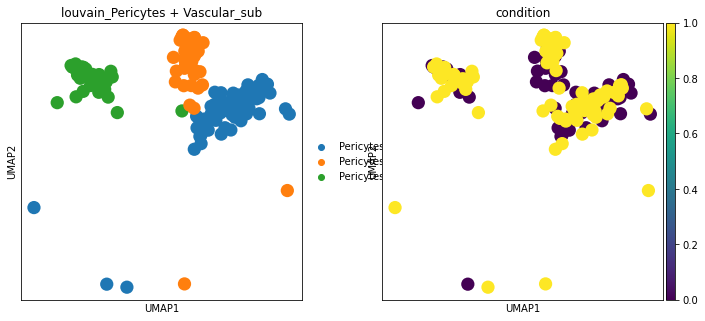

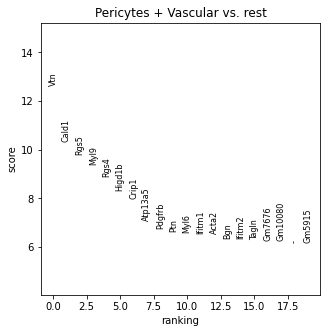

ranking genes
    finished: added to `.uns['rank_genes_Pericytes + Vascular_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


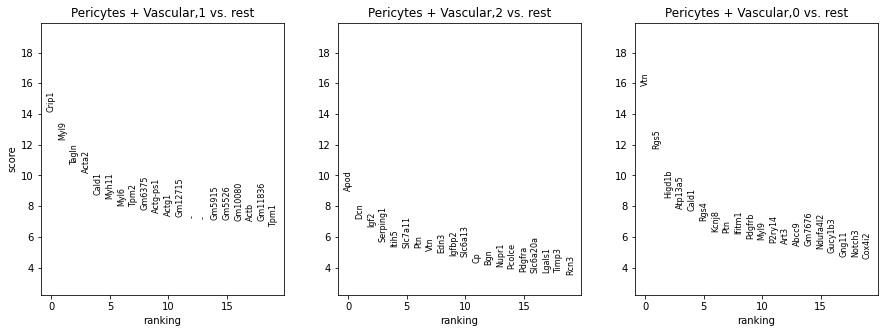

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 3 clusters and added
    'louvain_Pericytes + Vascular_sub', the cluster labels (adata.obs, categorical) (0:00:00)
ranking genes
    finished: added to `.uns['rank_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


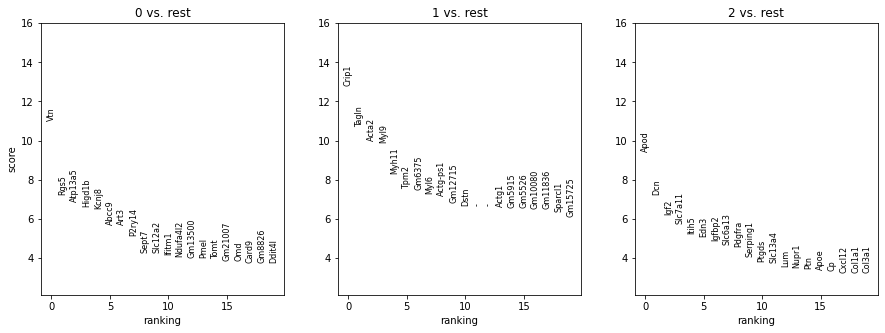

In [43]:
subcluster = 'Pericytes + Vascular'
louvain_res = 0.4
sc.tl.louvain(adata_hvg, restrict_to=('louvain_final', [subcluster]), resolution=louvain_res, key_added='louvain_' + subcluster + '_sub')
sc.pl.umap(adata_hvg[adata_hvg.obs['louvain_final']==subcluster], color=['louvain_' + subcluster + '_sub', 'condition'])

#Get the new marker genes
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_groups',
    gene_symbols='gene_symbols',
    groups=[subcluster]
)
sc.tl.rank_genes_groups(
    adata_hvg,
    groupby='louvain_' + subcluster + '_sub', key_added='rank_genes_' + subcluster + '_sub'
)
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_' + subcluster + '_sub',
    gene_symbols='gene_symbols',
    groups=adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].str.startswith(subcluster)].unique()
)

rank_genes_groups_sub(adata_hvg, 'louvain_final', subcluster, louvain_res)

In [44]:
adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.add_categories(['tmp', 'Pericytes', 'Vascular leptomeningeal cells', 'Vascular smooth muscle cells'])
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',0'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Pericytes'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',1'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Vascular smooth muscle cells'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',2'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Vascular leptomeningeal cells'

adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.remove_unused_categories()
adata_hvg.obs['louvain_final'] = adata_hvg.obs['louvain_' + subcluster + '_sub']
del adata_hvg.obs['louvain_' + subcluster + '_sub']

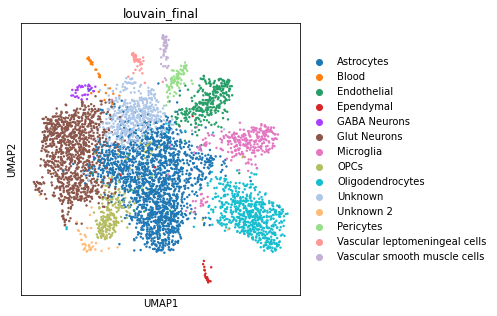

In [45]:
sc.pl.umap(adata_hvg, color='louvain_final')

# Microglia

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain_Microglia_sub', the cluster labels (adata.obs, categorical) (0:00:00)


Trying to set attribute `.uns` of view, copying.


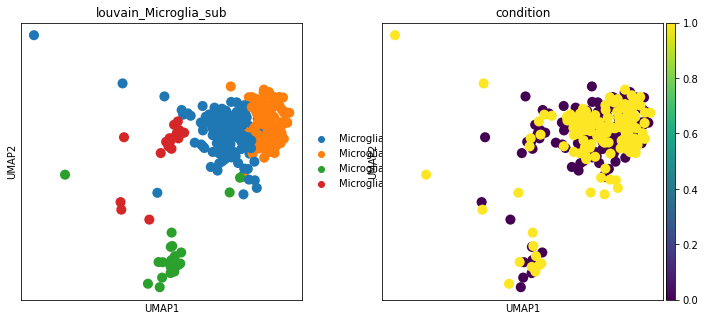

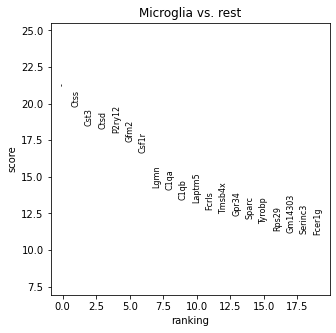

ranking genes
    finished: added to `.uns['rank_genes_Microglia_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:20)


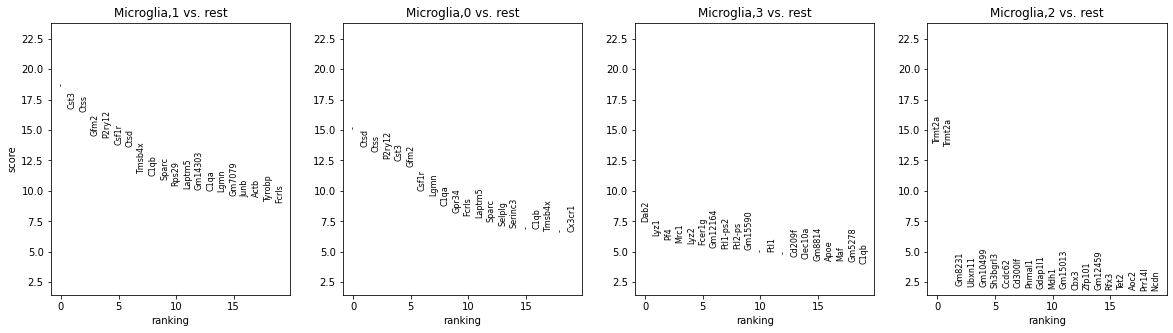

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain_Microglia_sub', the cluster labels (adata.obs, categorical) (0:00:00)
ranking genes
    finished: added to `.uns['rank_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


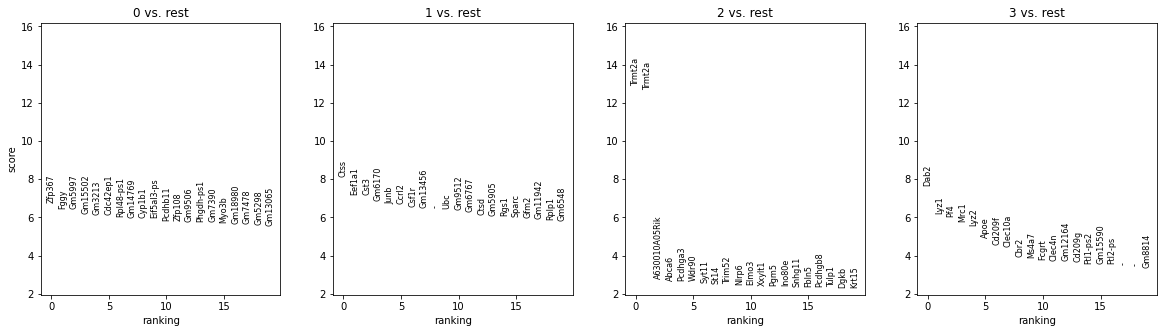

In [46]:
subcluster = 'Microglia'
louvain_res = 0.4
sc.tl.louvain(adata_hvg, restrict_to=('louvain_final', [subcluster]), resolution=louvain_res, key_added='louvain_' + subcluster + '_sub')
sc.pl.umap(adata_hvg[adata_hvg.obs['louvain_final']==subcluster], color=['louvain_' + subcluster + '_sub', 'condition'])

#Get the new marker genes
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_groups',
    gene_symbols='gene_symbols',
    groups=[subcluster]
)
sc.tl.rank_genes_groups(
    adata_hvg,
    groupby='louvain_' + subcluster + '_sub', key_added='rank_genes_' + subcluster + '_sub'
)
sc.pl.rank_genes_groups(
    adata_hvg,
    key='rank_genes_' + subcluster + '_sub',
    gene_symbols='gene_symbols',
    groups=adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].str.startswith(subcluster)].unique()
)

rank_genes_groups_sub(adata_hvg, 'louvain_final', subcluster, louvain_res)

In [47]:
adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.add_categories(['tmp', 'Microglia', 'Perivascular macrophages'])
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',0'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Microglia'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',1'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Microglia'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',2'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Microglia'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin([subcluster + ',3'])] = 'tmp'
adata_hvg.obs['louvain_' + subcluster + '_sub'][adata_hvg.obs['louvain_' + subcluster + '_sub'].isin(['tmp'])] = 'Perivascular macrophages'

adata_hvg.obs['louvain_' + subcluster + '_sub'] = adata_hvg.obs['louvain_' + subcluster + '_sub'].cat.remove_unused_categories()
adata_hvg.obs['louvain_final'] = adata_hvg.obs['louvain_' + subcluster + '_sub']
del adata_hvg.obs['louvain_' + subcluster + '_sub']

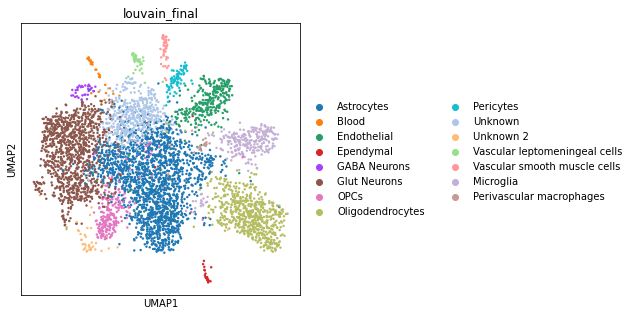

In [48]:
sc.pl.umap(adata_hvg, color='louvain_final')

In [52]:
adata_hvg.obs.louvain_final = adata_hvg.obs.louvain_final.cat.reorder_categories(
    [
        'Glut Neurons',
        'GABA Neurons',
        'Astrocytes',
        'Oligodendrocytes',
        'OPCs',
        'Microglia',
        'Perivascular macrophages',
        'Endothelial',
        'Ependymal',
        'Pericytes',
        'Vascular leptomeningeal cells',
        'Vascular smooth muscle cells',
        'Blood',
        'Unknown',
        'Unknown 2'
    ]
)

In [53]:
adata.obs['louvain_final'] = adata_hvg.obs.louvain_final.copy()

In [54]:
adata_hvg.write('./../data/Ketamine_Single_Cell/Ketamine_full_scran_nb_hvg_full_analysis_final.h5ad')
adata.write('./../data/Ketamine_Single_Cell/Ketamine_full_scran_nb_full_analysis_final.h5ad')